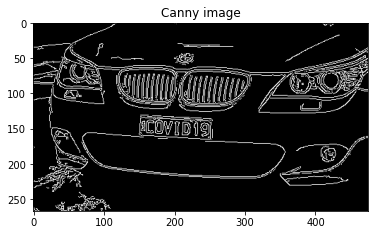

Posibles opciones: 12


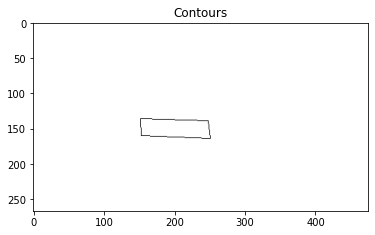

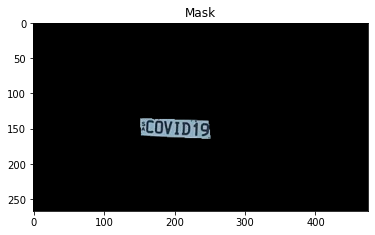

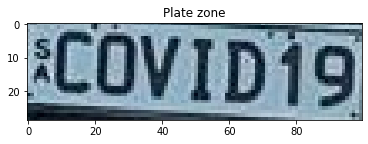

Original Image...
Height: 267, Width: 475, Area: 126825
Plate Zone Image
Height: 29, Width: 100, Area: 2900


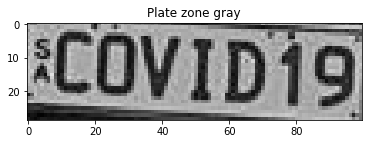

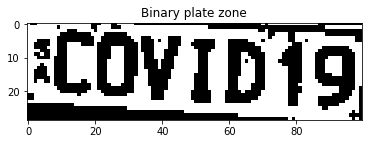

Found contours: 21


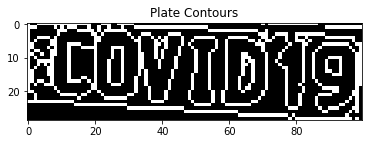

In [151]:
import numpy as np
import cv2 #This is openCV
import matplotlib.pyplot as plt 

#Upload images and save it in gray scale
plate_original = cv2.imread('Fig/Placa7.jpg', cv2.IMREAD_COLOR)
plate_gray = cv2.cvtColor(plate_original, cv2.COLOR_BGR2GRAY)
bilateral_blur = cv2.bilateralFilter(plate_gray,11,17,17)
edged = cv2.Canny(bilateral_blur, 30, 150)
plt.title("Canny image")
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

location = []
for cnt in contours:
  approx = cv2.approxPolyDP(cnt, 8, True)
  if(len(approx) == 4):
    location.append(approx)

print(f"Posibles opciones: {len(location)}")
location = sorted(location, key = cv2.contourArea, reverse = True)

selected_contour = 0
white_background = np.zeros_like(plate_gray) + 255

cv2.drawContours(white_background, location, selected_contour, (0), 1)
plt.title("Contours")
plt.imshow(cv2.cvtColor(white_background, cv2.COLOR_BGR2RGB))
plt.show()


mask = np.zeros_like(plate_gray)
new_image = cv2.drawContours(mask, location, selected_contour, 255, -1)
plt.title("Mask")
new_image = cv2.bitwise_and(plate_original, plate_original, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
plate_zone = plate_original[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(plate_zone, cv2.COLOR_BGR2RGB))
plt.title("Plate zone")
plt.show()

h, w = plate_gray.shape
image_area = h*w
print(f"Original Image...\nHeight: {h}, Width: {w}, Area: {image_area}")

h_plate, w_plate, c = plate_zone.shape
plate_area = h_plate*w_plate
print(f"Plate Zone Image\nHeight: {h_plate}, Width: {w_plate}, Area: {plate_area}")

# selected_area = cv2.contourArea(location[selected_contour])
# factor = 0.02
# print(f"Area of selected contour: {selected_area}")
# print(f"Is it big enough to be considered a plate? {selected_area > factor*(image_area) }")


plate_zone_gray = cv2.cvtColor(plate_zone, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(plate_zone_gray, cv2.COLOR_BGR2RGB))
plt.title("Plate zone gray")
plt.show()


plate_zone_binary = cv2.threshold(plate_zone_gray, 150, 255, cv2.THRESH_BINARY)[1]
plt.title("Binary plate zone")
plt.imshow(cv2.cvtColor(plate_zone_binary, cv2.COLOR_BGR2RGB))
plt.show()

plate_contours, plate_hierarchy = cv2.findContours(plate_zone_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(f"Found contours: {len(plate_contours)}")

black_background = np.zeros_like(plate_zone)
cv2.drawContours(black_background, plate_contours, -1, (255, 255, 255), 1)
plt.title("Plate Contours")
plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
plt.show()
